In [4]:
import numpy as np
np.set_printoptions(precision = 3)
import pandas as pd
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('whitegrid')

happy = pd.read_csv('C:/Users/이가은/Desktop/after_EDA/happynot.csv',thousands = ',')

         Q10    Q12       Q16A    Q23        Q34  Q42C2
Q10    1.000 -0.004  1.604e-02  0.002  1.120e-02 -0.106
Q12   -0.004  1.000  3.206e-01  0.158  7.462e-02  0.169
Q16A   0.016  0.321  1.000e+00  0.169  4.830e-04  0.040
Q23    0.002  0.158  1.691e-01  1.000  1.467e-02 -0.041
Q34    0.011  0.075  4.830e-04  0.015  1.000e+00  0.027
Q42C2 -0.106  0.169  3.977e-02 -0.041  2.679e-02  1.000


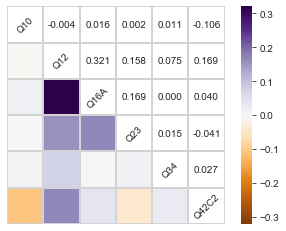

In [6]:
# Numeric
# Compute the correlation matrix
corrnumeric = happy[['Q10', 'Q12', 'Q16A','Q23','Q34','Q42C2']].corr() # corr값 계산하고
print(corrnumeric)
# Generate a mask for the upper triangle
mask = np.zeros_like(corrnumeric, dtype=np.bool) # Upper triangular로 만드는거라네요
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corrnumeric.values[~mask]).max()
sns.heatmap(corrnumeric, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corrnumeric)): # 위치 조절
    ax.text(i+0.5,(i+0.5), corrnumeric.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corrnumeric)):
        s = "{:.3f}".format(corrnumeric.values[i,j])
        ax.text(j+0.5,i+0.5,s, 
            ha="center", va="center")
ax.axis("off")
plt.show()